In [2]:
library(Seurat)
library(Signac)

In [ ]:
# takes rna/atac multiome and integrates it with cleaned histone object 
# integrates by the rna of the rna/atac multiome and the rna of the h3k27ac/h3k27me3
# manually annotated based on previous clusters "celltype_v02", smaller clusters not removed yet

# input: JL_10_1_2_JL_09_1_2_DF.0.05.RDS (doubletfindered, but not filtered)
# input: 231220_lung_pt_integ_reanno_filt.RDS

# output: 240103_lung_pt_integ_atac.RDS
# output: cleaned object, 06_paired_tag_integ_atac/240104_lung_pt_integ_atac_nodoub.RDS

In [ ]:
Sys.time()
H3K27me3_counts_RNA_NEW <- Read10X_h5("/projects/ps-epigen/10x_output/231025_IGM/counts_out/Multiome/QY_2221_1_2_QY_2220_1_2/outs/raw_feature_bc_matrix.h5")
Sys.time()

In [ ]:
H3K27me3_fragpath <- "/projects/ps-epigen/10x_output/231025_IGM/counts_out/Multiome/QY_2221_1_2_QY_2220_1_2/outs/atac_fragments.tsv.gz"
genome.use <- seqlengths(BSgenome.Mmusculus.UCSC.mm10::BSgenome.Mmusculus.UCSC.mm10) 
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79, verbose = F)

In [ ]:
seqlevels(annotations) <- paste0('chr', seqlevels(annotations))
#Seurat Object for RNA data
H3K27me3_CT_RNA_Multiome <- CreateSeuratObject( counts = H3K27me3_counts_RNA_NEW$`Gene Expression`, assay = "RNA",
 min.features = 1,
  min.cells = 1
)


In [ ]:
VlnPlot(H3K27me3_CT_RNA_Multiome , c("nCount_RNA", "nFeature_RNA"), ncol = 4,
       pt.size = 0)

In [ ]:
H3K27me3_CT_RNA_Multiome[["percent.mt"]] <- PercentageFeatureSet(H3K27me3_CT_RNA_Multiome, pattern = "^mt-", assay = "RNA")

In [ ]:
VlnPlot(H3K27me3_CT_RNA_Multiome , c("nCount_RNA", "nFeature_RNA", "percent.mt"), ncol = 4,
       pt.size = 1)

In [ ]:
quantile(H3K27me3_CT_RNA_Multiome$nCount_RNA)
quantile(H3K27me3_CT_RNA_Multiome$nFeature_RNA)
quantile(H3K27me3_CT_RNA_Multiome$percent.mt)
# missing values and NaN's not allowed if 'na.rm' is FALSE percent.mt probs due to empty droplets

In [ ]:
# Cellbarcodes RNA data
# add the atac
H3K27me3_cells_RNA <- colnames(filt_obj_H3K27me3 )

In [ ]:
H3K27me3_fragments_Multiome <- CreateFragmentObject(path = H3K27me3_fragpath, cells = H3K27me3_cells_RNA,
                                           verbose = TRUE,validate.fragments = TRUE)

In [ ]:
H3K27me3_fragments_Multiome 

In [ ]:
raw_obj_H3K27me3[["RNA"]]<- CreateAssayObject(counts = H3K27me3_counts_RNA_NEW$"Gene Expression"[,colnames(raw_obj_H3K27me3)])


In [ ]:
cts_pks <- H3K27me3_counts_RNA_NEW$Peaks[,H3K27me3_cells_RNA]
dim(cts_pks)

In [ ]:
# atac object

In [ ]:
# the dimension reduction is most likely based on the rna

In [10]:
sobj_atac <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/02_DoubletFinder/df_objs/JL_10_1_2_JL_09_1_2_DF.0.05.RDS")

In [11]:
sobj_atac

An object of class Seurat 
126070 features across 9603 samples within 3 assays 
Active assay: SCT (18528 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 2 dimensional reductions calculated: pca, umap

In [12]:
colnames(sobj_atac@meta.data)

[1] "orig.ident"                       "nCount_RNA"                      
 [3] "nFeature_RNA"                     "nCount_ATAC"                     
 [5] "nFeature_ATAC"                    "fragments_freq_count"            
 [7] "FRiP"                             "percent.mt"                      
 [9] "nCount_SCT"                       "nFeature_SCT"                    
[11] "pANN_0.25_0.04_707"               "DF.classifications_0.25_0.04_707"

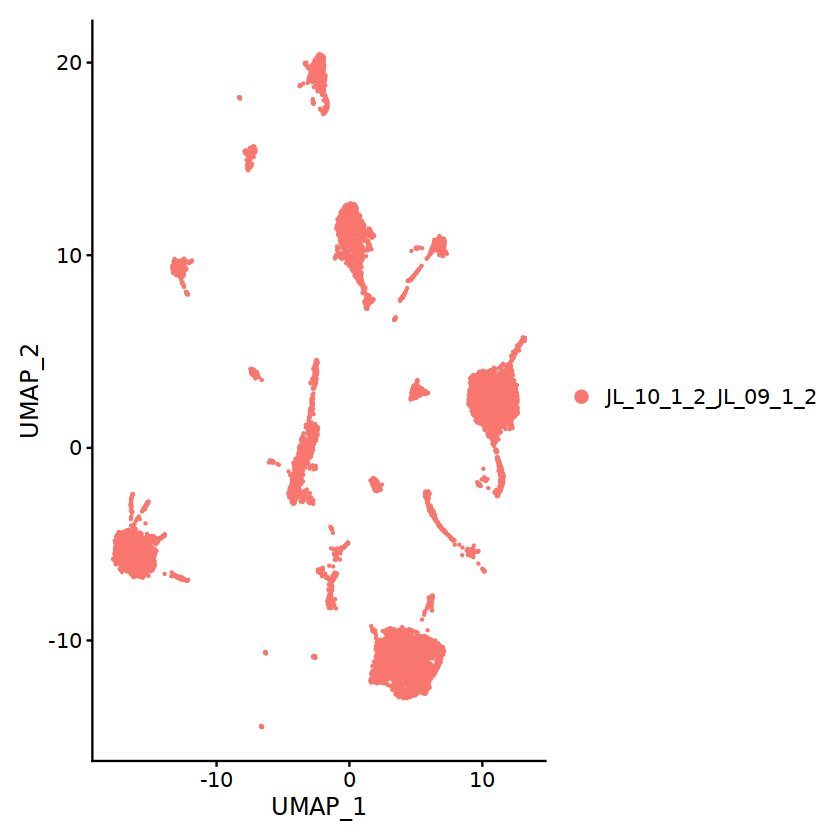

In [13]:
DimPlot(sobj_atac)

In [ ]:
sobj_atac[[]]

In [15]:
md <- sobj_atac@meta.data


In [17]:
df_col_nm <-  grep("DF.classifications",colnames(md), value = T)
pann_col_nm <-  grep("pANN",colnames(md), value = T)
df_col_nm 
pann_col_nm

[1] "DF.classifications_0.25_0.04_707"

[1] "pANN_0.25_0.04_707"

In [19]:
sobj_atac$DF.classifications_RNA <- sobj_atac[[c(df_col_nm)]]
sobj_atac$pANN_RNA <- sobj_atac[[c(pann_col_nm)]]



In [20]:
colnames(sobj_atac@meta.data)

[1] "orig.ident"                       "nCount_RNA"                      
 [3] "nFeature_RNA"                     "nCount_ATAC"                     
 [5] "nFeature_ATAC"                    "fragments_freq_count"            
 [7] "FRiP"                             "percent.mt"                      
 [9] "nCount_SCT"                       "nFeature_SCT"                    
[11] "pANN_0.25_0.04_707"               "DF.classifications_0.25_0.04_707"
[13] "DF.classifications_RNA"           "pANN_RNA"

In [ ]:
VlnPlot(sobj_atac)

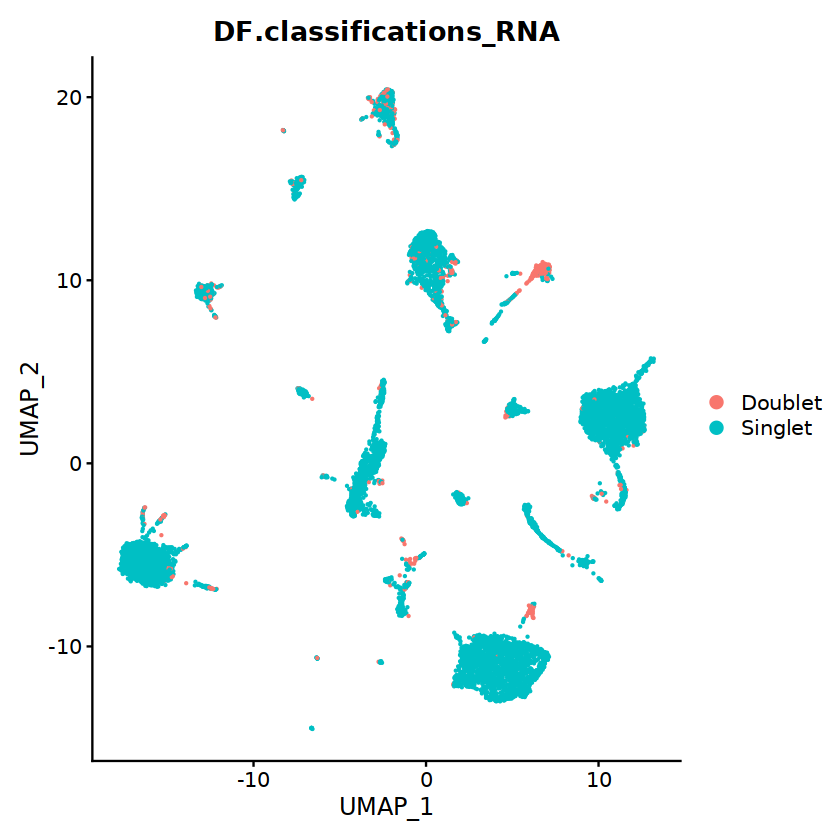

In [21]:
DimPlot(sobj_atac, group.by = "DF.classifications_RNA")

In [22]:
sobj_atac[[c(df_col_nm)]] <- NULL
sobj_atac[[c(pann_col_nm)]] <- NULL

In [23]:
colnames(sobj_atac@meta.data)

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"          
 [4] "nCount_ATAC"            "nFeature_ATAC"          "fragments_freq_count"  
 [7] "FRiP"                   "percent.mt"             "nCount_SCT"            
[10] "nFeature_SCT"           "DF.classifications_RNA" "pANN_RNA"

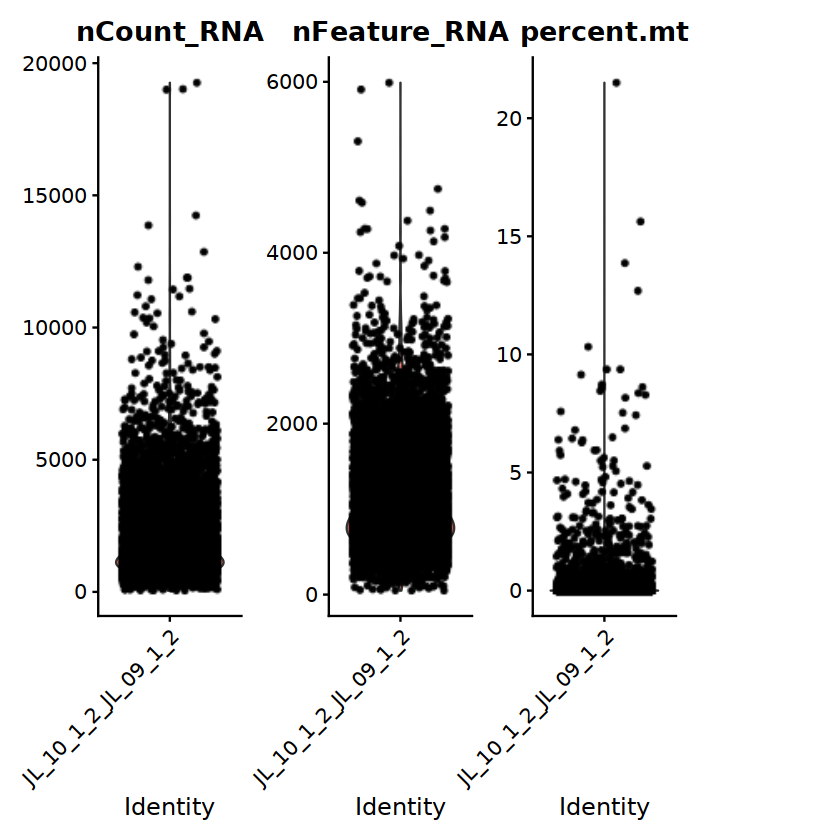

In [26]:
VlnPlot(sobj_atac , c("nCount_RNA", "nFeature_RNA", "percent.mt"), ncol = 4,
       pt.size = 1)

In [27]:
quantile(sobj_atac$nCount_RNA)
quantile(sobj_atac$nFeature_RNA)
quantile(sobj_atac$percent.mt)
# missing values and NaN's not allowed if 'na.rm' is FALSE percent.mt probs due to empty droplets

0%   25%   50%   75%  100% 
   50  1044  1554  2514 19258

0%  25%  50%  75% 100% 
  47  716  983 1403 5989

0%         25%         50%         75%        100% 
 0.00000000  0.00000000  0.00000000  0.08416328 21.49944873

In [ ]:
# renamed doulbetfinder column

In [7]:
sobj_hist <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/05_paired_tag_integ/231220_lung_pt_integ_reanno_filt.RDS")

In [8]:
sobj_hist

An object of class Seurat 
124150 features across 14956 samples within 4 assays 
Active assay: integrated (2000 features, 2000 variable features)
 3 other assays present: RNA, H3K27me3, H3K27ac
 2 dimensional reductions calculated: pca, integrated.umap

In [9]:
colnames(sobj_hist@meta.data)

[1] "orig.ident"                               
 [2] "nCount_RNA"                               
 [3] "nFeature_RNA"                             
 [4] "percent.mt"                               
 [5] "nCount_H3K27me3"                          
 [6] "nFeature_H3K27me3"                        
 [7] "library_rna_atac_id"                      
 [8] "RNA_snn_res.0.5"                          
 [9] "seurat_clusters"                          
[10] "nCount_H3K27ac"                           
[11] "nFeature_H3K27ac"                         
[12] "integrated_snn_res.0.5"                   
[13] "predicted.id"                             
[14] "prediction.score.unclassified"            
[15] "prediction.score.vascular.smooth.muscle"  
[16] "prediction.score.alveolar.developmental"  
[17] "prediction.score.ciliated"                
[18] "prediction.score.myofibroblast"           
[19] "prediction.score.fibroblast"              
[20] "prediction.score.endothelium"             
[21] "prediction.score.alveolar.type.1"         
[22] "prediction.score.alveolar.type.2"         
[23] "prediction.score.macrophage"              
[24] "prediction.score.pulmonary.neuroendocrine"
[25] "prediction.score.airway.smooth.muscle"    
[26] "prediction.score.NK.T.cell"               
[27] "prediction.score.B.cell"                  
[28] "prediction.score.max"                     
[29] "DF.classifications"                       
[30] "celltype"                                 
[31] "celltype_v02"

In [ ]:
# seems like will be running on SCT assay in RNA/ATAC multiome and 'integrated' assay in H3k27ac/h3k27me3

In [ ]:
# 05:08pm-05:19pm seems to get stuck when using SCT assay and integrated assay 

In [ ]:
# maybe try using RNA for both like how i did for integrateing the ac and me3

In [ ]:
#  list(sobj_hist, sobj_atac)

In [30]:
sobj_hist

An object of class Seurat 
124150 features across 14956 samples within 4 assays 
Active assay: integrated (2000 features, 2000 variable features)
 3 other assays present: RNA, H3K27me3, H3K27ac
 2 dimensional reductions calculated: pca, integrated.umap

In [31]:
sobj_atac

An object of class Seurat 
126070 features across 9603 samples within 3 assays 
Active assay: SCT (18528 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 2 dimensional reductions calculated: pca, umap

In [32]:
DefaultAssay(sobj_hist) <- 'RNA'

In [33]:
DefaultAssay(sobj_atac) <- 'RNA'

In [34]:
sobj_hist
sobj_atac

An object of class Seurat 
124150 features across 14956 samples within 4 assays 
Active assay: RNA (27405 features, 0 variable features)
 3 other assays present: H3K27me3, H3K27ac, integrated
 2 dimensional reductions calculated: pca, integrated.umap

An object of class Seurat 
126070 features across 9603 samples within 3 assays 
Active assay: RNA (32285 features, 0 variable features)
 2 other assays present: ATAC, SCT
 2 dimensional reductions calculated: pca, umap

In [37]:
colnames(sobj_atac@meta.data)

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"          
 [4] "nCount_ATAC"            "nFeature_ATAC"          "fragments_freq_count"  
 [7] "FRiP"                   "percent.mt"             "nCount_SCT"            
[10] "nFeature_SCT"           "DF.classifications_RNA" "pANN_RNA"

In [38]:
unique(sobj_atac$orig.ident)

[1] JL_10_1_2_JL_09_1_2
Levels: JL_10_1_2_JL_09_1_2

In [35]:
Sys.time()
obj.list <- list(sobj_hist, sobj_atac)
obj.list <- lapply(X = obj.list, FUN = function(x) {
x <- NormalizeData(x)
x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})
Sys.time()


[1] "2024-01-03 17:21:00 PST"

[1] "2024-01-03 17:21:04 PST"

In [39]:
Sys.time()

int.features <- SelectIntegrationFeatures(object.list = obj.list)
obj.anchors <- FindIntegrationAnchors(object.list = obj.list, anchor.features = int.features)
Sys.time()


[1] "2024-01-03 17:22:03 PST"

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 18411 anchors

Filtering anchors

	Retained 9131 anchors



[1] "2024-01-03 17:25:18 PST"

In [42]:
length(int.features)

[1] 2000

In [40]:
obj.anchors

An AnchorSet object containing 18262 anchors between 2 Seurat objects 
 This can be used as input to IntegrateData.

In [ ]:
## can you integrate on an already integrated h3k27ac+k327me3 object?

In [43]:
Sys.time()

obj <- IntegrateData(anchorset = obj.anchors, new.assay.name = "integrated_atac")
Sys.time()


[1] "2024-01-03 17:25:46 PST"

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from integrated_atac_ to integratedatac_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from integrated_atac_ to integratedatac_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from integrated_atac_ to integratedatac_”


[1] "2024-01-03 17:26:28 PST"

In [44]:
obj

An object of class Seurat 
224815 features across 24559 samples within 7 assays 
Active assay: integrated_atac (2000 features, 2000 variable features)
 6 other assays present: RNA, H3K27me3, H3K27ac, integrated, ATAC, SCT

In [45]:
obj@assays$integrated_atac

Assay data with 2000 features for 24559 cells
Top 10 variable features:
 Galntl6, Kcnq5, F13a1, Chil3, Ctnna3, Nxph1, Gpc6, Htr2c, Grip1,
Cfap299 

In [ ]:
length(rownames(obj@assays$integrated_atac))


In [46]:
DefaultAssay(obj) <- "integrated_atac"


In [47]:
Sys.time()

obj <- ScaleData(obj, verbose = FALSE)
obj <- RunPCA(obj, npcs = 30, verbose = FALSE)
obj <- RunUMAP(obj, reduction = "pca", dims = 1:30, reduction.name = "integrated.atac.umap")

Sys.time()


[1] "2024-01-03 17:27:22 PST"

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:27:27 UMAP embedding parameters a = 0.9922 b = 1.112

17:27:27 Read 24559 rows and found 30 numeric columns

17:27:27 Using Annoy for neighbor search, n_neighbors = 30

17:27:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:27:31 Writing NN index file to temp file /scratch/cmiciano/34093775.tscc-mgr7.local/RtmpH5trfa/file3e73b78dec206

17:27:31 Searching Annoy index using 1 thread, search_k = 3000

17:27:40 Annoy recall = 100%

17:27:41 Commencing smooth kNN distance calibration u

[1] "2024-01-03 17:28:15 PST"

In [48]:
obj 

An object of class Seurat 
224815 features across 24559 samples within 7 assays 
Active assay: integrated_atac (2000 features, 2000 variable features)
 6 other assays present: RNA, H3K27me3, H3K27ac, integrated, ATAC, SCT
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [49]:
obj <- FindNeighbors(obj, reduction = "pca", dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [50]:
obj <- FindClusters(obj, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24559
Number of edges: 1148201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9473
Number of communities: 29
Elapsed time: 3 seconds


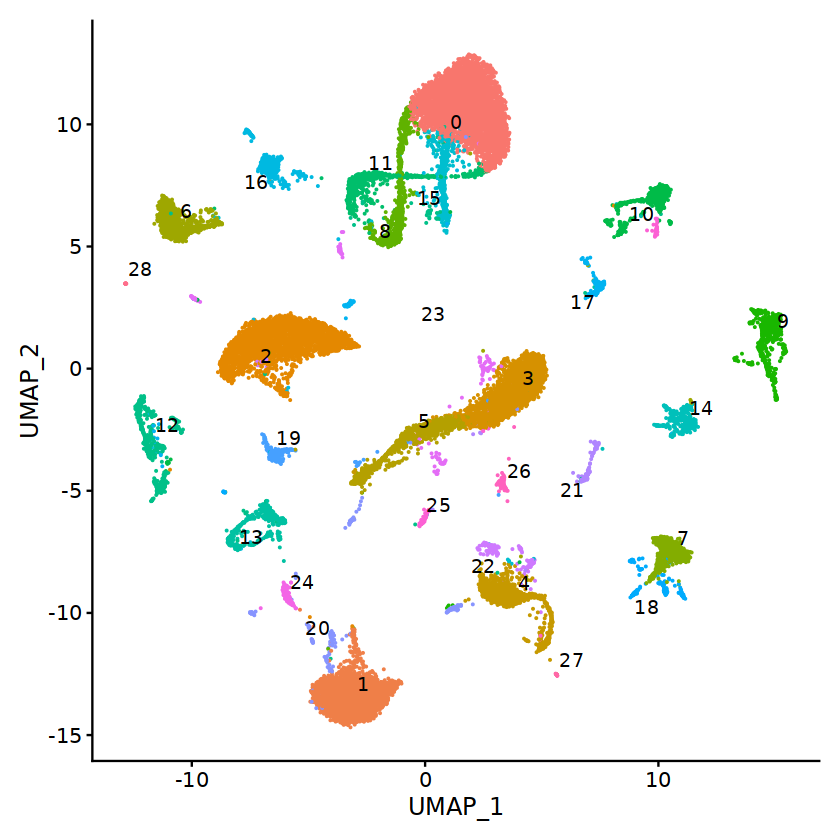

In [51]:
DimPlot(obj, reduction = "integrated.atac.umap", label = T, repel = T) + NoLegend()

In [ ]:
# ucell featureplots
# 16 - mostly endo but some epi
# 17 - top has some endo, mostly immune
# 18 - some endo
# 19 - epi and mesen
# 20 - has endo overall and epi overall
# 21 - mesen
# 22 - top part is epi, right part is endo from overall
# 23 - overall endo, some immune and mesen?
# 25 - has some endo, mesen
# 26 - some epi, mesen
# 27 - PNEC
# 28 - some endo

ERROR: Error in eval(expr, envir, enclos): object 'obj' not found


In [ ]:
# maybe remove
# 16 - on collisions
# 17 - on collisions
# 19 - on collisions
# 20 - on collisions
# 22 - on collisions
# 23 - on collisions
# 24 - dunno if at1 or at2
# 25 - on collisions
# 26 - on collisions
# 28 - just tiny

In [66]:
table(obj@meta.data$seurat_clusters)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
4463 3211 2918 2539 1073 1056 1035  777  773  770  749  689  685  514  457  446 
  16   17   18   19   20   21   22   23   24   25   26   27   28 
 425  273  242  225  222  197  193  188  171  146   83   24   15 

In [ ]:
# based on ucell heatmap
# 0 - Capillary
# 1 - AT1
# 2 - AT2
# 3 - Fibroblasts
# 4 - Club cell / probs relabel as secretory
# 5 - Fibroblasts
# 6 - endothelium?
# 7 - overall immune but most likely macrophages
# 8 - lymphatics? but probs artery / vein
# 9 - ciliated
# 10 - top expressed are overall mesen and club cells,  actually pericytes
# 11 - lymphatics? also have high exp of club cells and overall endothelium
# 12 - highest in overall endothelial? actually bcell 
# 13 - overall immune? actually tcell
# 14 - mesothelial, also higher in club cell markers 
# 15 - capillary, also high in club cell markers
# 16 - AT2 markers highest, and capillary and overall endothelium?
# 17 - overall immune, isolated in bcell markers, some AT2 markers?
# 18 - overall immune, also has some expression of fibroblasts?
# 19 - highlighted in myofibroblasts and at2
# 20 - highest in AT1 markers? 
# 21 - seems isolated in airway smooth muscle
# 22 - highest in club cells and at2 cells
# 23 - highest in myofibroblasts, club cells
# 24 - mostly at2 but also high in at1
# 25 - highest in smooth muscle
# 26 - myofibroblasts and club cells
# 27 - PNEC
# 28 - club cells and mesenchymal

In [52]:
colnames(obj@meta.data)

[1] "orig.ident"                               
 [2] "nCount_RNA"                               
 [3] "nFeature_RNA"                             
 [4] "percent.mt"                               
 [5] "nCount_H3K27me3"                          
 [6] "nFeature_H3K27me3"                        
 [7] "library_rna_atac_id"                      
 [8] "RNA_snn_res.0.5"                          
 [9] "seurat_clusters"                          
[10] "nCount_H3K27ac"                           
[11] "nFeature_H3K27ac"                         
[12] "integrated_snn_res.0.5"                   
[13] "predicted.id"                             
[14] "prediction.score.unclassified"            
[15] "prediction.score.vascular.smooth.muscle"  
[16] "prediction.score.alveolar.developmental"  
[17] "prediction.score.ciliated"                
[18] "prediction.score.myofibroblast"           
[19] "prediction.score.fibroblast"              
[20] "prediction.score.endothelium"             
[21] "prediction.score.alveolar.type.1"         
[22] "prediction.score.alveolar.type.2"         
[23] "prediction.score.macrophage"              
[24] "prediction.score.pulmonary.neuroendocrine"
[25] "prediction.score.airway.smooth.muscle"    
[26] "prediction.score.NK.T.cell"               
[27] "prediction.score.B.cell"                  
[28] "prediction.score.max"                     
[29] "DF.classifications"                       
[30] "celltype"                                 
[31] "celltype_v02"                             
[32] "nCount_ATAC"                              
[33] "nFeature_ATAC"                            
[34] "fragments_freq_count"                     
[35] "FRiP"                                     
[36] "nCount_SCT"                               
[37] "nFeature_SCT"                             
[38] "DF.classifications_RNA"                   
[39] "pANN_RNA"                                 
[40] "integrated_atac_snn_res.0.5"

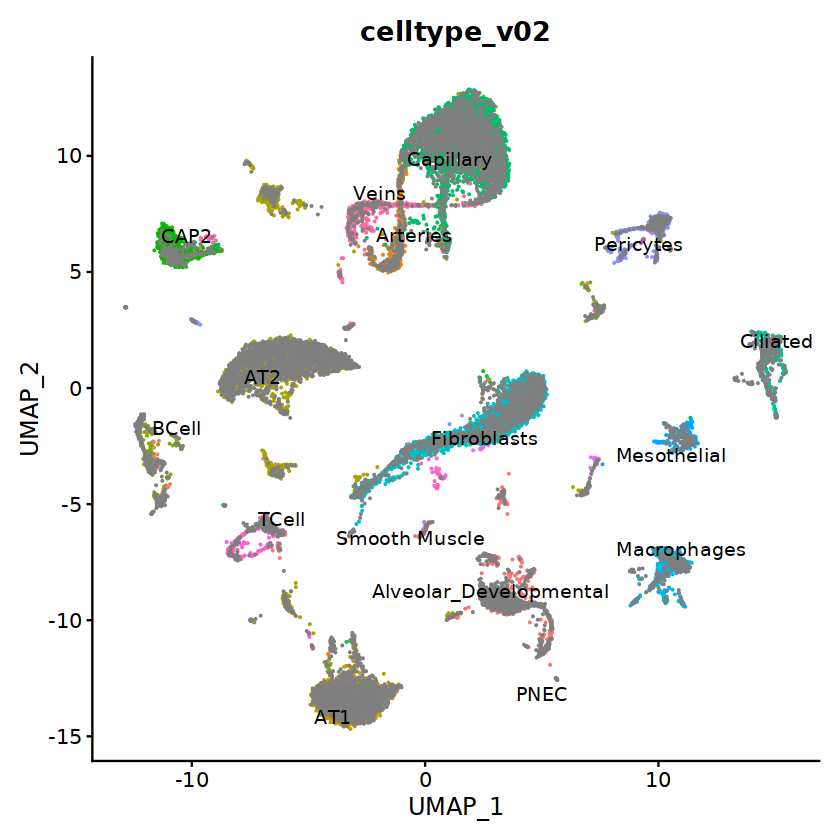

In [53]:
DimPlot(obj, reduction = "integrated.atac.umap", label = T, repel = T, group.by = "celltype_v02") + NoLegend()

In [74]:
library(dplyr)
assignment <- obj$seurat_clusters
celltype_manual_anno <- case_when(


    assignment == 0 ~ "Capillary",
    assignment == 1 ~ "AT1",
    assignment == 2 ~ "AT2",
    assignment == 3 ~ "Fibroblasts",
    
    assignment == 4 ~ "Alveolar_Developmental", #?
    
    assignment == 5 ~ "Fibroblasts",
    assignment == 6 ~ "CAP2", #? 
   
    assignment == 7 ~ "Macrophages", #?,
    assignment == 8 ~ "Artery",
    assignment == 9 ~ "Ciliated",
    
    assignment == 10 ~ "Pericytes",
    assignment == 11 ~ "Veins",
   
    assignment == 12 ~ "BCell",
    assignment == 13 ~ "TCell",

    assignment == 14 ~ "Mesothelial", 
    
    assignment == 15 ~ "Capillary",
    assignment == 16 ~ "AT2", 
   
    assignment == 17 ~ "AT2" ,
    assignment == 18 ~ "Macrophages",
    
    assignment == 19 ~ "AT2",
    assignment == 20 ~ "AT1", 
   
    assignment == 21 ~ "Mesothelial",
    assignment == 22 ~ "Alveolar_Developmental",

    assignment == 23 ~ "Fibroblasts", 
    
    assignment == 24 ~ "AT1",
    assignment == 25 ~ "Alveolar_Developmental", 
   
    assignment == 26 ~ "Alveolar_Developmental", 
    assignment == 27 ~ "PNEC", 
    assignment == 28 ~ "CAP2"

  
    

    
)

In [75]:
obj$celltype_v03 <- celltype_manual_anno

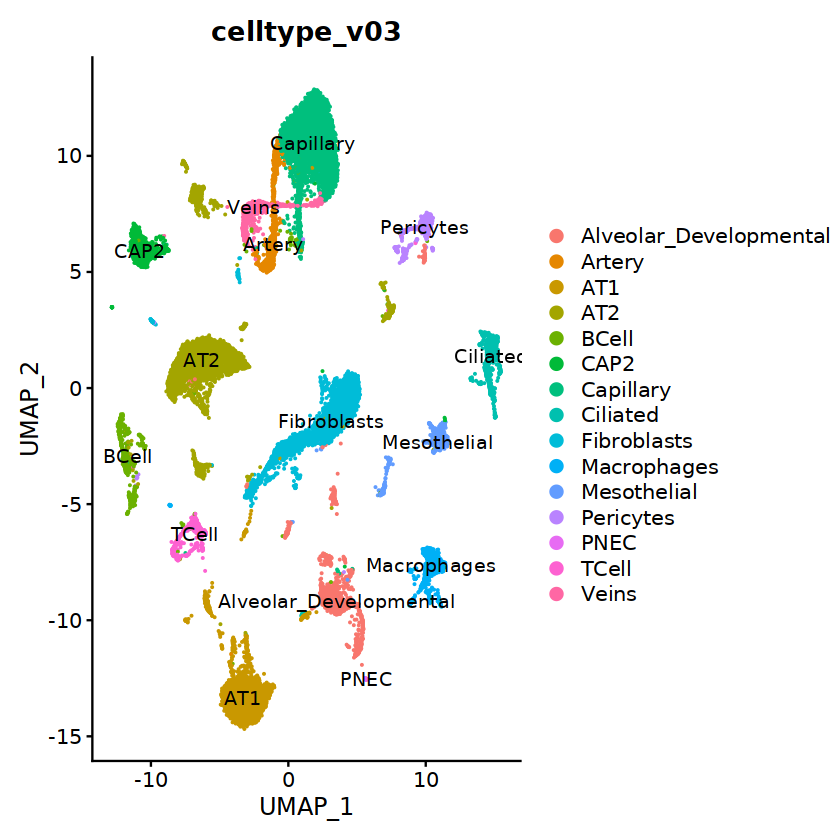

In [76]:
DimPlot(obj, group.by = "celltype_v03", label = T)

In [ ]:
# rename alveolar_developmental to secretory

In [ ]:
    
0 - Capillary 
1 - AT1
2 - AT2
3 - Fibroblasts
4 - Alveolar_Developmental
5 - Fibroblasts
6 - CAP2 
7 - Macrophages
8 - Artery
9 - Ciliated
10 - Pericytes
11 - Veins
12 - BCell
13 - TCell
14 - Mesothelial
15 - Capillary
16 - AT2?
17 - AT2?
18 - Macrophages?
19  - AT2?
20 - AT1?
21 - Mesothelial?
22 - Alveolar_Developmental?
23 - Veins?
24 - AT1?
25 - Alveolar_Developmental?
26 - Alveolar_Developmental?
27 - PNEC
28 - CAP2?


In [ ]:
# clusters might not be sure of identity
# cluster 16 maybe at2
# cluster 17 maybe at2
# cluster 18 probs macrophages
# cluster 19 probs at2
# cluster 20 probs at1?
# cluster 21 mix of at2 and immune, maybe name mesothelial for now based on proximity
# cluster 22 probs alveolar_developmental
# cluster 23 put veins for now
# cluster 24 mix of tcell and at1
# cluster 25 and 26 mix of immune, put alveolar_developmental for now
# cluster 28 probs cap2?

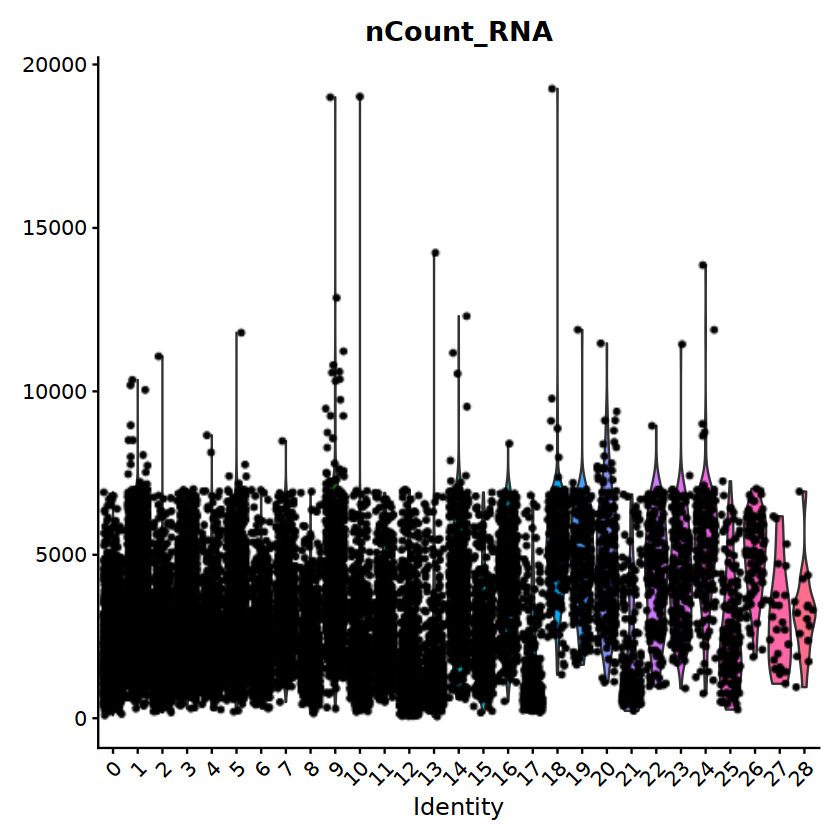

In [63]:
VlnPlot(obj , c("nCount_RNA"), pt.size = 1, group.by = "seurat_clusters") + NoLegend()

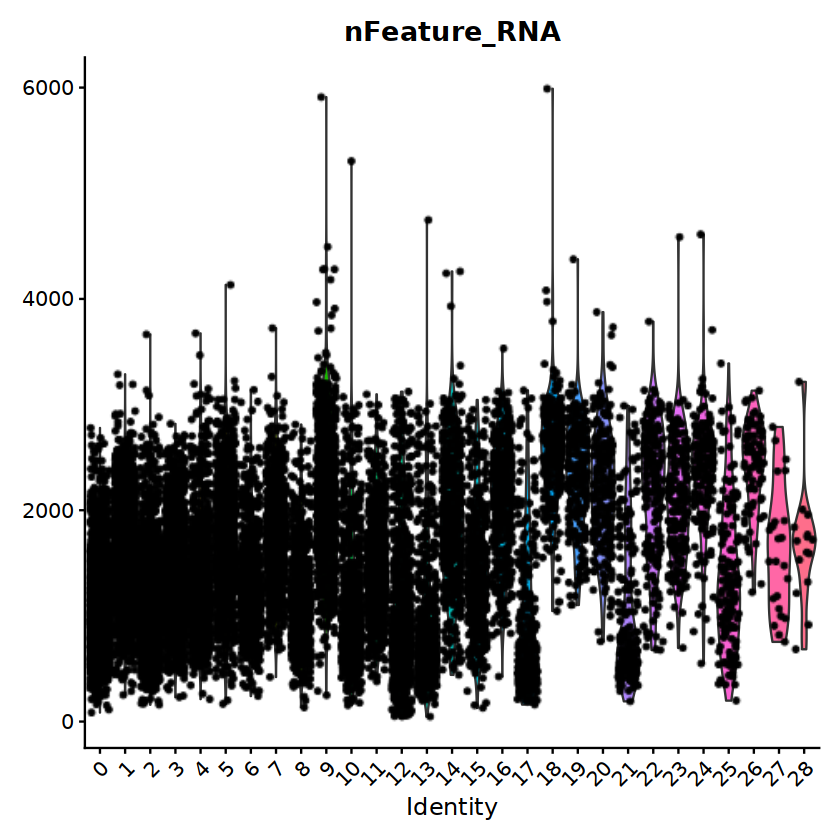

In [64]:
VlnPlot(obj , c("nFeature_RNA"), pt.size = 1, group.by = "seurat_clusters") + NoLegend()

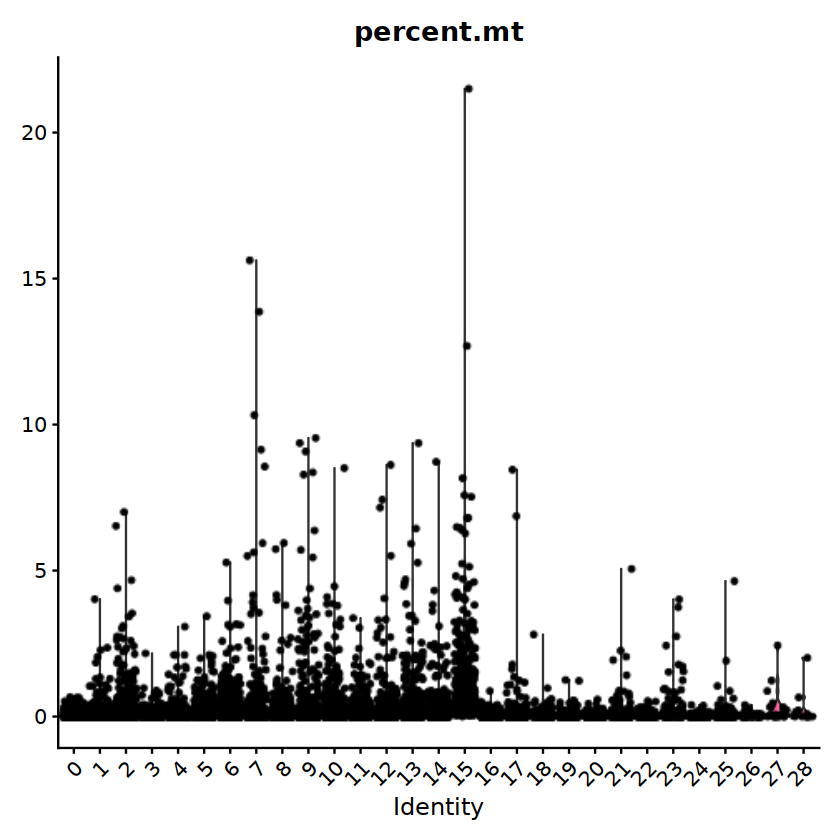

In [65]:
VlnPlot(obj , c("percent.mt"), pt.size = 1, group.by = "seurat_clusters") + NoLegend()

In [ ]:
#  "nFeature_RNA", "percent.mt"

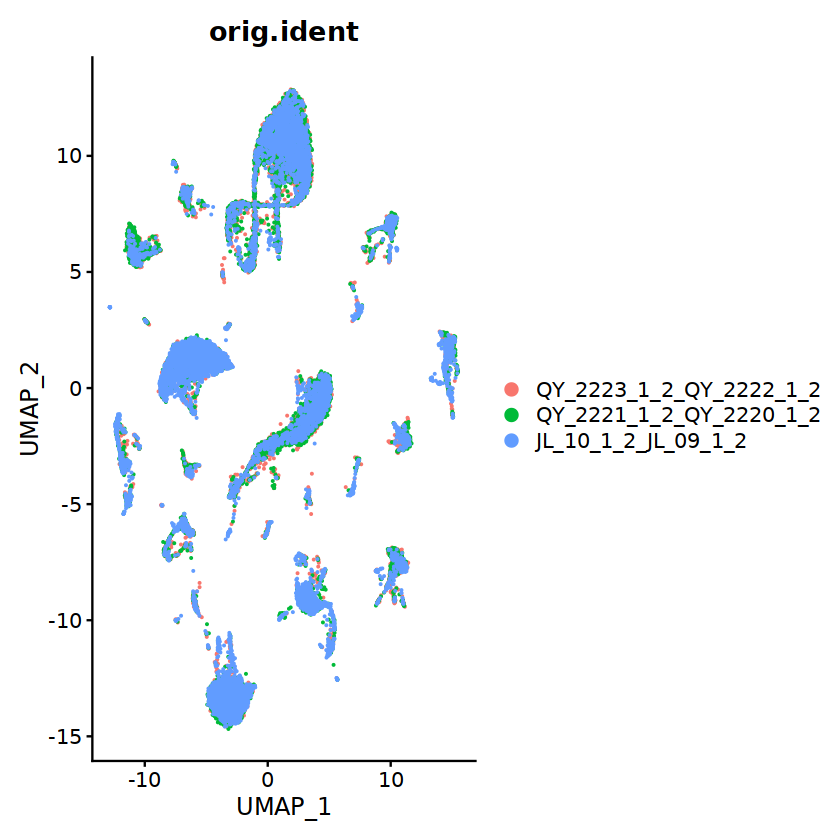

In [54]:
t1 <- DimPlot(obj, reduction = "integrated.atac.umap", order = c("JL_10_1_2_JL_09_1_2", "QY_2221_1_2_QY_2220_1_2", "QY_2223_1_2_QY_2222_1_2" ),
                                                        group.by = "orig.ident")
t1

In [55]:
obj[['integrated_atac']]

obj[['integrated']]
obj[['RNA']]
obj[['H3K27me3']]
obj[['H3K27ac']]

Assay data with 2000 features for 24559 cells
Top 10 variable features:
 Galntl6, Kcnq5, F13a1, Chil3, Ctnna3, Nxph1, Gpc6, Htr2c, Grip1,
Cfap299 

Assay data with 2000 features for 24559 cells
First 10 features:
 Ttn, Myh6, Fgf12, Ryr2, Kcnj3, D830005E20Rik, Cdc20b, Car3, Mlip, Rbm20 

Assay data with 32285 features for 24559 cells
First 10 features:
 Xkr4, Gm1992, Gm19938, Gm37381, Rp1, Sox17, Gm37587, Gm37323, Mrpl15,
Lypla1 

ChromatinAssay data with 23296 features for 24559 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

Assay data with 71449 features for 24559 cells
First 10 features:
 chr1-3514511-3515425, chr1-3670705-3671174, chr1-3671301-3672079,
chr1-3913364-3914223, chr1-4408825-4409545, chr1-4412196-4413074,
chr1-4456478-4457389, chr1-4471192-4471869, chr1-4489814-4490155,
chr1-4490261-4490799 

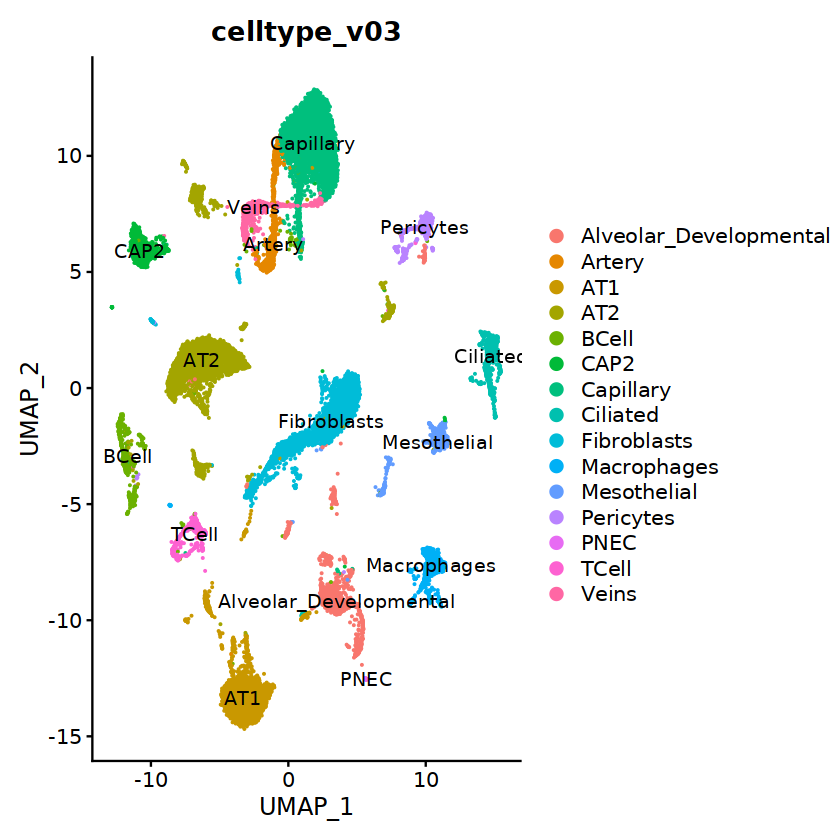

In [78]:
DimPlot(obj, group.by = "celltype_v03", label = T)

In [79]:
dir.create('/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/06_paired_tag_integ_atac/')

Warning message in dir.create("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/06_paired_tag_integ_atac/"):
“'/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/06_paired_tag_integ_atac' already exists”


In [ ]:
# saving object where atac multiome is not cleaned yet

In [81]:
Sys.time()
saveRDS(obj , "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/06_paired_tag_integ_atac/240103_lung_pt_integ_atac.RDS")
Sys.time()

[1] "2024-01-03 17:57:51 PST"

[1] "2024-01-03 17:59:14 PST"

In [3]:
obj <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/06_paired_tag_integ_atac/240103_lung_pt_integ_atac.RDS")

In [5]:
obj

An object of class Seurat 
224815 features across 24559 samples within 7 assays 
Active assay: integrated_atac (2000 features, 2000 variable features)
 6 other assays present: RNA, H3K27me3, H3K27ac, integrated, ATAC, SCT
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [7]:
library(Seurat)
library(Signac)

In [9]:
colnames(obj@meta.data)

[1] "orig.ident"                               
 [2] "nCount_RNA"                               
 [3] "nFeature_RNA"                             
 [4] "percent.mt"                               
 [5] "nCount_H3K27me3"                          
 [6] "nFeature_H3K27me3"                        
 [7] "library_rna_atac_id"                      
 [8] "RNA_snn_res.0.5"                          
 [9] "seurat_clusters"                          
[10] "nCount_H3K27ac"                           
[11] "nFeature_H3K27ac"                         
[12] "integrated_snn_res.0.5"                   
[13] "predicted.id"                             
[14] "prediction.score.unclassified"            
[15] "prediction.score.vascular.smooth.muscle"  
[16] "prediction.score.alveolar.developmental"  
[17] "prediction.score.ciliated"                
[18] "prediction.score.myofibroblast"           
[19] "prediction.score.fibroblast"              
[20] "prediction.score.endothelium"             
[21] "prediction.score.alveolar.type.1"         
[22] "prediction.score.alveolar.type.2"         
[23] "prediction.score.macrophage"              
[24] "prediction.score.pulmonary.neuroendocrine"
[25] "prediction.score.airway.smooth.muscle"    
[26] "prediction.score.NK.T.cell"               
[27] "prediction.score.B.cell"                  
[28] "prediction.score.max"                     
[29] "DF.classifications"                       
[30] "celltype"                                 
[31] "celltype_v02"                             
[32] "nCount_ATAC"                              
[33] "nFeature_ATAC"                            
[34] "fragments_freq_count"                     
[35] "FRiP"                                     
[36] "nCount_SCT"                               
[37] "nFeature_SCT"                             
[38] "DF.classifications_RNA"                   
[39] "pANN_RNA"                                 
[40] "integrated_atac_snn_res.0.5"              
[41] "celltype_v03"

In [19]:
table(obj$DF.classifications_RNA)


Doublet Singlet 
    707    8896 

In [28]:
sobj_filt <- subset(obj, seurat_clusters %in% c(16, 17, 19, 20, 22, 23, 24, 26, 26, 28), invert = T)


In [29]:
sobj_filt

An object of class Seurat 
224815 features across 22764 samples within 7 assays 
Active assay: integrated_atac (2000 features, 2000 variable features)
 6 other assays present: RNA, H3K27me3, H3K27ac, integrated, ATAC, SCT
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [21]:
colnames(sobj_filt@meta.data)

[1] "orig.ident"                               
 [2] "nCount_RNA"                               
 [3] "nFeature_RNA"                             
 [4] "percent.mt"                               
 [5] "nCount_H3K27me3"                          
 [6] "nFeature_H3K27me3"                        
 [7] "library_rna_atac_id"                      
 [8] "RNA_snn_res.0.5"                          
 [9] "seurat_clusters"                          
[10] "nCount_H3K27ac"                           
[11] "nFeature_H3K27ac"                         
[12] "integrated_snn_res.0.5"                   
[13] "predicted.id"                             
[14] "prediction.score.unclassified"            
[15] "prediction.score.vascular.smooth.muscle"  
[16] "prediction.score.alveolar.developmental"  
[17] "prediction.score.ciliated"                
[18] "prediction.score.myofibroblast"           
[19] "prediction.score.fibroblast"              
[20] "prediction.score.endothelium"             
[21] "prediction.score.alveolar.type.1"         
[22] "prediction.score.alveolar.type.2"         
[23] "prediction.score.macrophage"              
[24] "prediction.score.pulmonary.neuroendocrine"
[25] "prediction.score.airway.smooth.muscle"    
[26] "prediction.score.NK.T.cell"               
[27] "prediction.score.B.cell"                  
[28] "prediction.score.max"                     
[29] "DF.classifications"                       
[30] "celltype"                                 
[31] "celltype_v02"                             
[32] "nCount_ATAC"                              
[33] "nFeature_ATAC"                            
[34] "fragments_freq_count"                     
[35] "FRiP"                                     
[36] "nCount_SCT"                               
[37] "nFeature_SCT"                             
[38] "DF.classifications_RNA"                   
[39] "pANN_RNA"                                 
[40] "integrated_atac_snn_res.0.5"              
[41] "celltype_v03"                             
[42] "nCount_integrated"                        
[43] "nFeature_integrated"

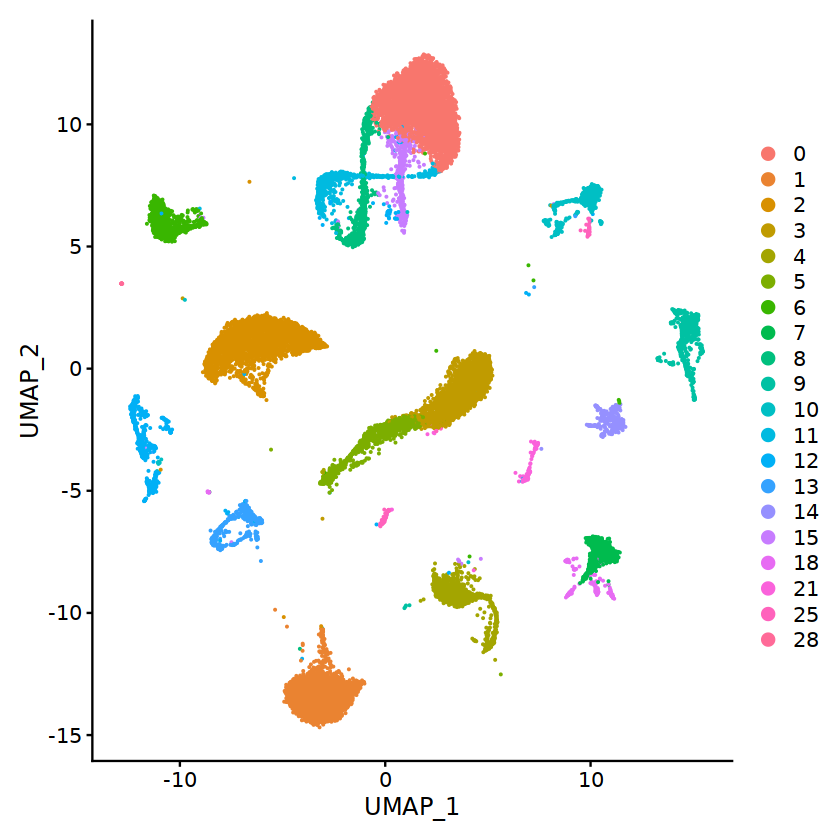

In [8]:
DimPlot(sobj_filt)

In [13]:
smooth.muscle.markers <- c("Acta2", "Tagln", "Lgr6", "Pdgfrb", "Notch3") 
airway.smooth.muscle.markers <- c("Act2", "Tagln", "Lgr6", "Des")
vascular.smooth.muscle <- c("Pdgfrb", "Notch3", "Acta2", "Cnn1", "Tagln", "Lgr5")
# seems like 25 and 21 are smooth muscle 

Warning message:
“Found the following features in more than one assay, excluding the default. We will not include these in the final data frame: Tagln”
Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: Tagln”


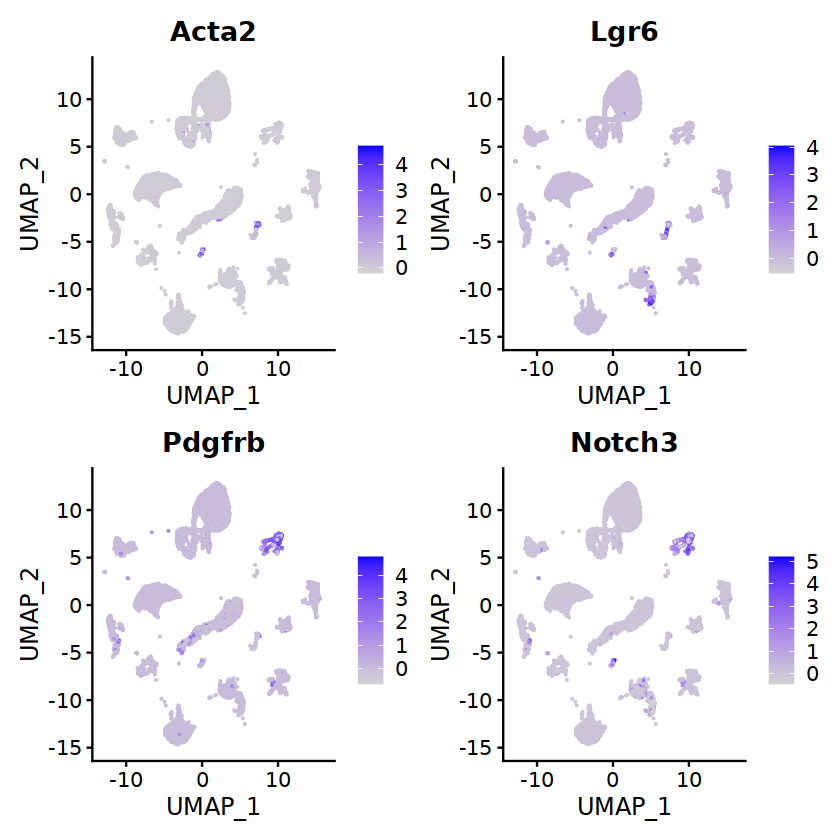

In [14]:
FeaturePlot(sobj_filt, smooth.muscle.markers)

Warning message:
“Found the following features in more than one assay, excluding the default. We will not include these in the final data frame: Tagln”
Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: Act2, Tagln”


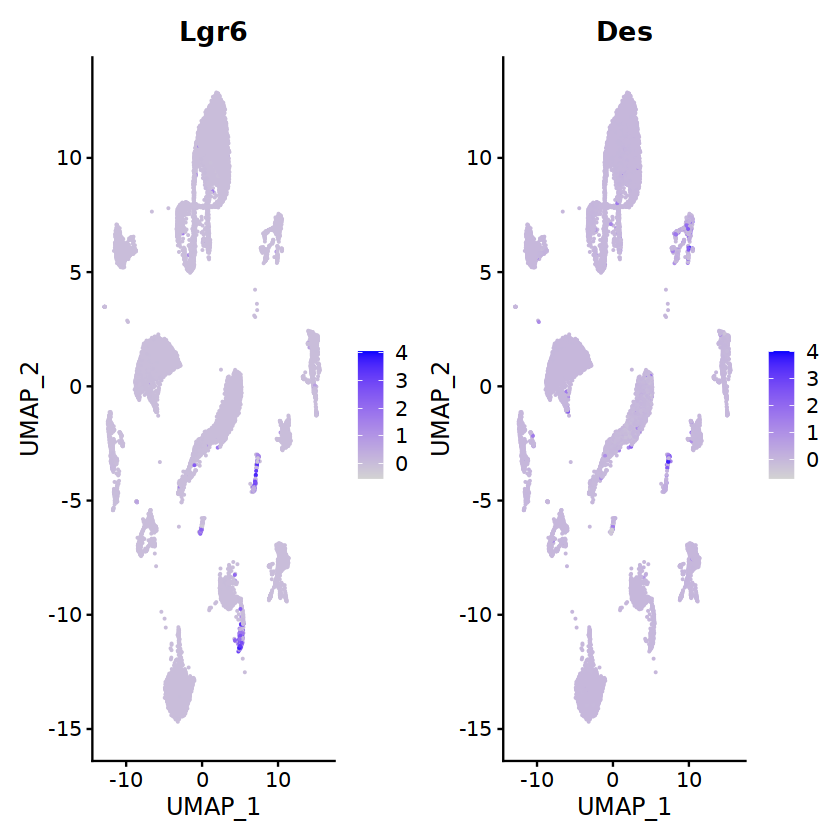

In [15]:
FeaturePlot(sobj_filt, airway.smooth.muscle.markers )

Warning message:
“Found the following features in more than one assay, excluding the default. We will not include these in the final data frame: Tagln”
Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: Tagln”


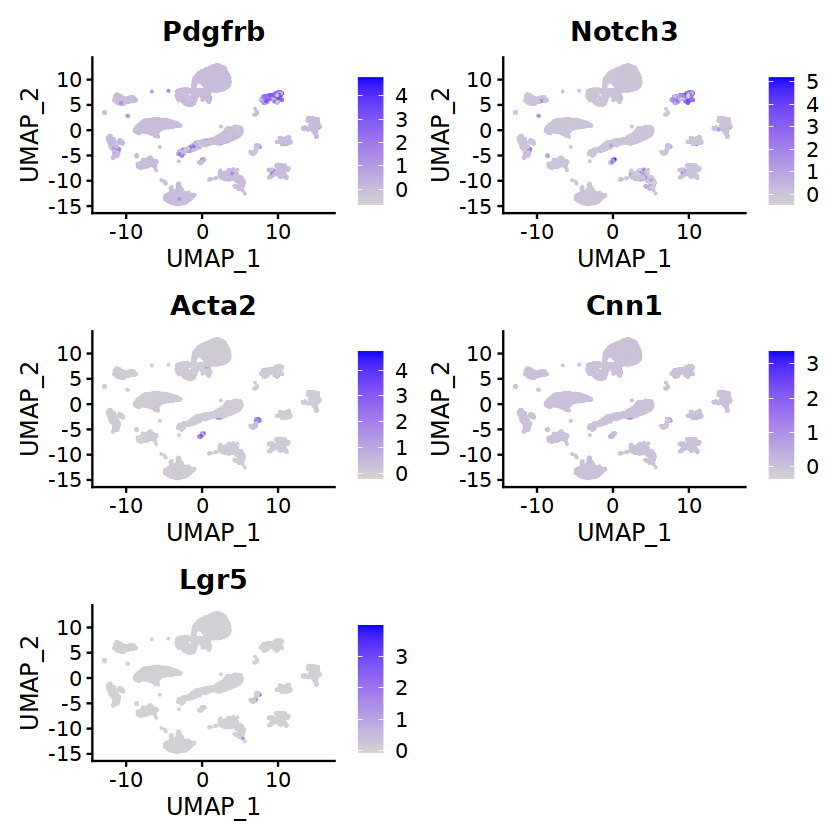

In [16]:
FeaturePlot(sobj_filt, vascular.smooth.muscle)

In [17]:
macrophages.markers <- c("Adgre1", "Itgam", "Ltc4s", "Plet1", "Fabp1", "Atp6vod2", "S100a9", "Camp", "Mrc") 


Warning message:
“Found the following features in more than one assay, excluding the default. We will not include these in the final data frame: Ltc4s”
Warning message:
“Could not find Camp in the default search locations, found in RNA assay instead”
Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: Ltc4s, Atp6vod2, Mrc”


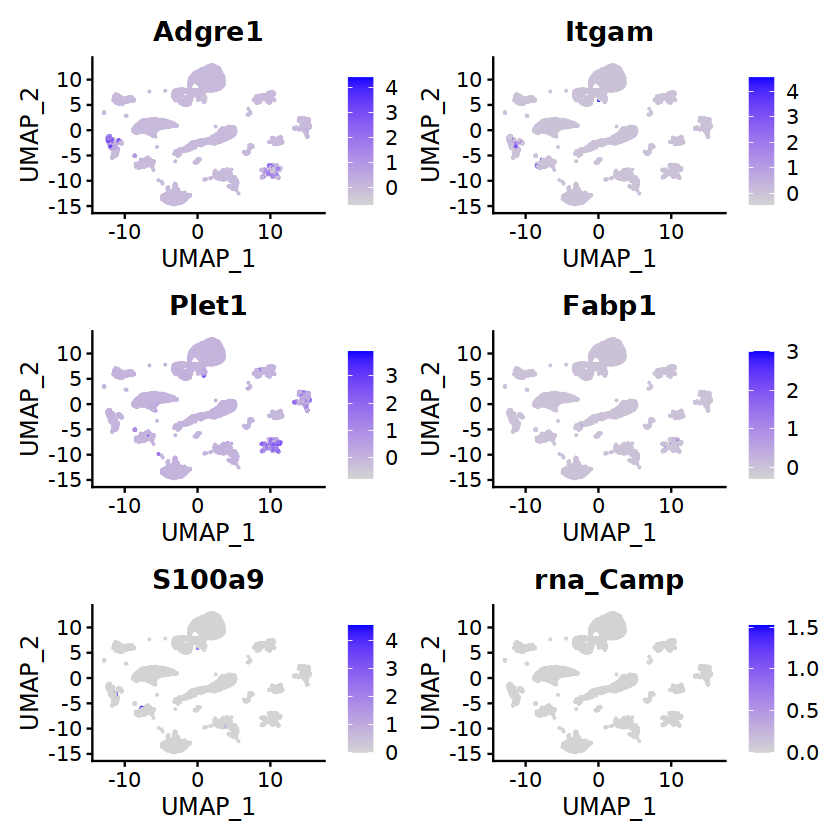

In [18]:
FeaturePlot(sobj_filt, macrophages.markers)

In [32]:
table(sobj_filt$DF.classifications_RNA)


Doublet Singlet 
    522    8374 

In [30]:
sobj_filt_nodoub <- subset(sobj_filt, DF.classifications_RNA %in% c(NA,"Singlet"))


In [31]:
sobj_filt_nodoub

An object of class Seurat 
224815 features across 22242 samples within 7 assays 
Active assay: integrated_atac (2000 features, 2000 variable features)
 6 other assays present: RNA, H3K27me3, H3K27ac, integrated, ATAC, SCT
 2 dimensional reductions calculated: pca, integrated.atac.umap

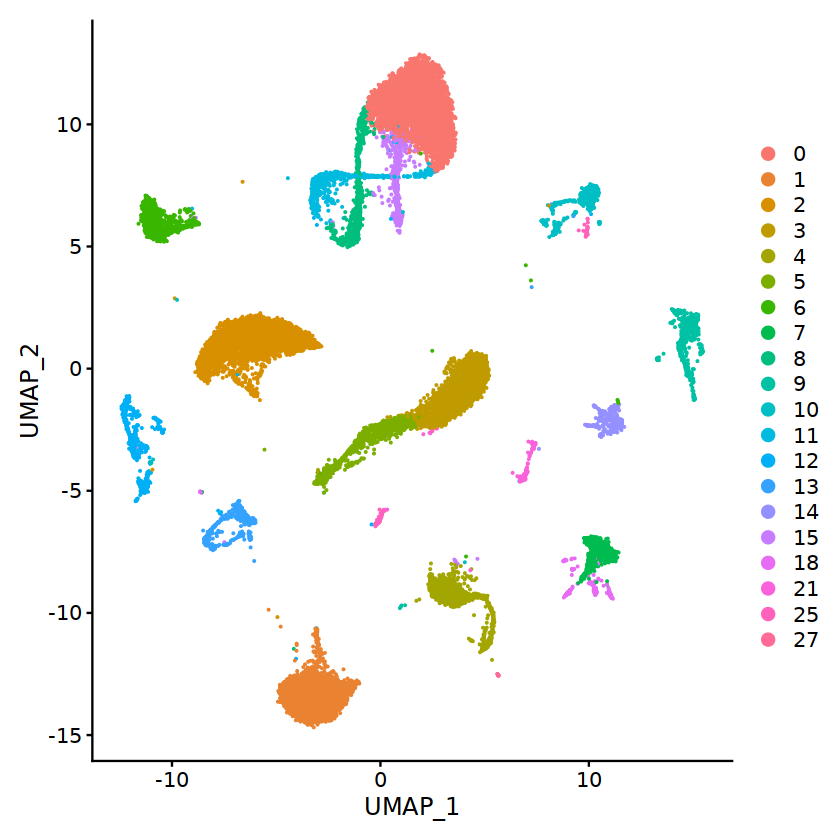

In [35]:
DimPlot(sobj_filt_nodoub)

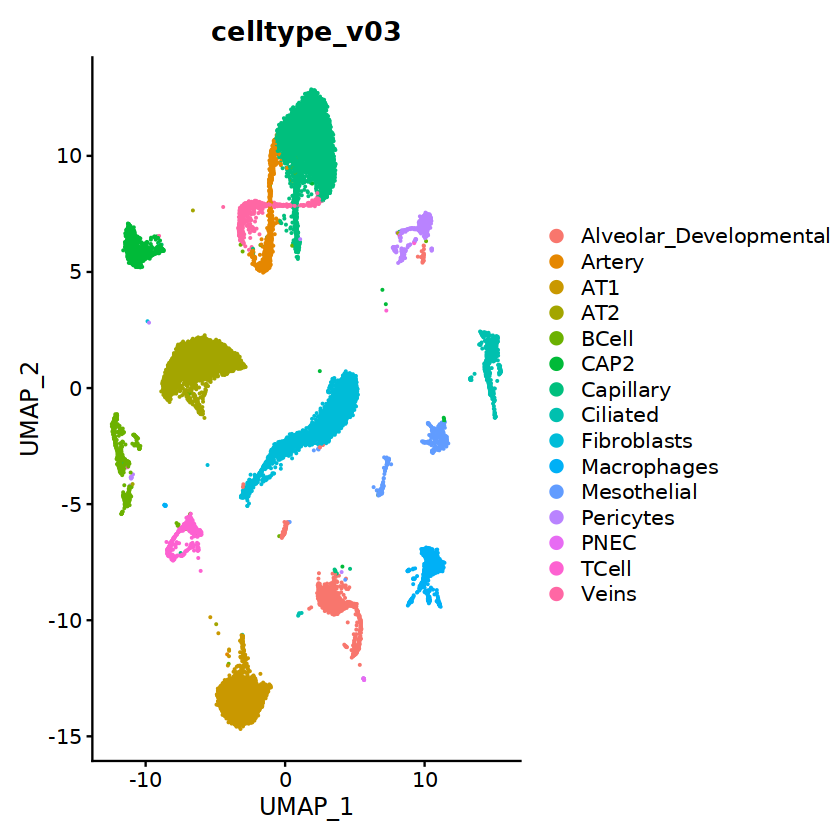

In [37]:
DimPlot(sobj_filt_nodoub, group.by = "celltype_v03")

In [ ]:
# reclustering

In [38]:
sobj_filt_nodoub

An object of class Seurat 
224815 features across 22242 samples within 7 assays 
Active assay: integrated_atac (2000 features, 2000 variable features)
 6 other assays present: RNA, H3K27me3, H3K27ac, integrated, ATAC, SCT
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [ ]:
# after subsetting cells rerunning from scale data
# running on assay integrated_atac

In [40]:
Sys.time()

sobj_filt_nodoub <- ScaleData(sobj_filt_nodoub, verbose = FALSE)
sobj_filt_nodoub <- RunPCA(sobj_filt_nodoub, npcs = 30, verbose = FALSE)
sobj_filt_nodoub <- RunUMAP(sobj_filt_nodoub, reduction = "pca", dims = 1:30, reduction.name = "integrated.atac.umap")

Sys.time()


[1] "2024-01-04 14:37:50 PST"

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:37:56 UMAP embedding parameters a = 0.9922 b = 1.112

14:37:56 Read 22242 rows and found 30 numeric columns

14:37:56 Using Annoy for neighbor search, n_neighbors = 30

14:37:56 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:37:58 Writing NN index file to temp file /scratch/cmiciano/34094738.tscc-mgr7.local/RtmpOY9Ofd/file293cf4e8e37d5

14:37:58 Searching Annoy index using 1 thread, search_k = 3000

14:38:05 Annoy recall = 100%

14:38:06 Commencing smooth kNN distance calibration u

[1] "2024-01-04 14:38:38 PST"

In [41]:
sobj_filt_nodoub <- FindNeighbors(sobj_filt_nodoub, reduction = "pca", dims = 1:30)
sobj_filt_nodoub <- FindClusters(sobj_filt_nodoub, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22242
Number of edges: 1053164

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9404
Number of communities: 20
Elapsed time: 3 seconds


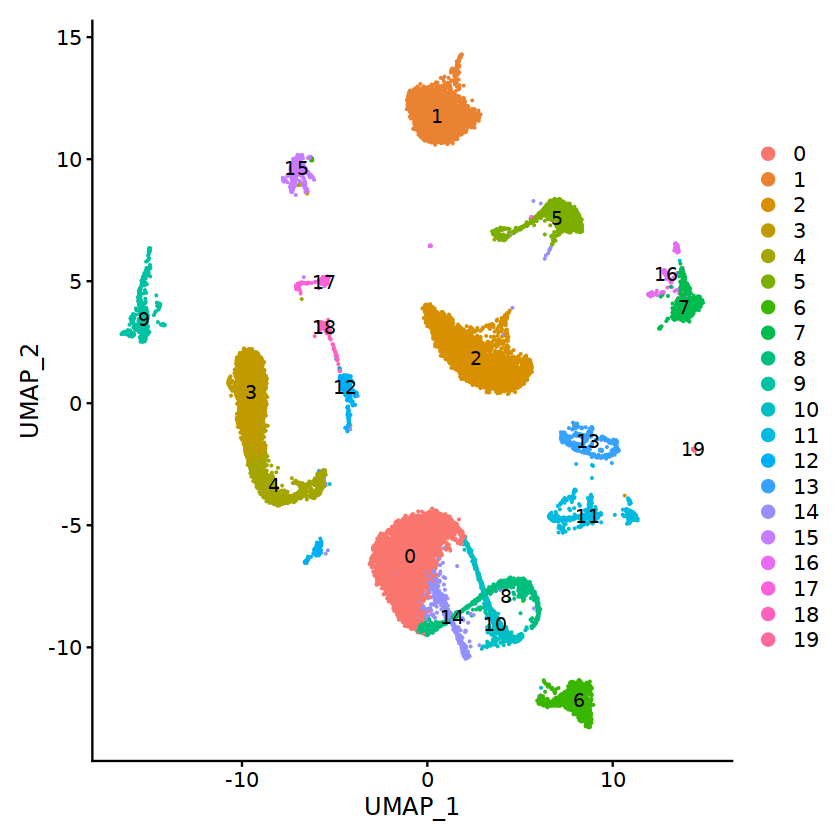

In [53]:
DimPlot(sobj_filt_nodoub, label = T)

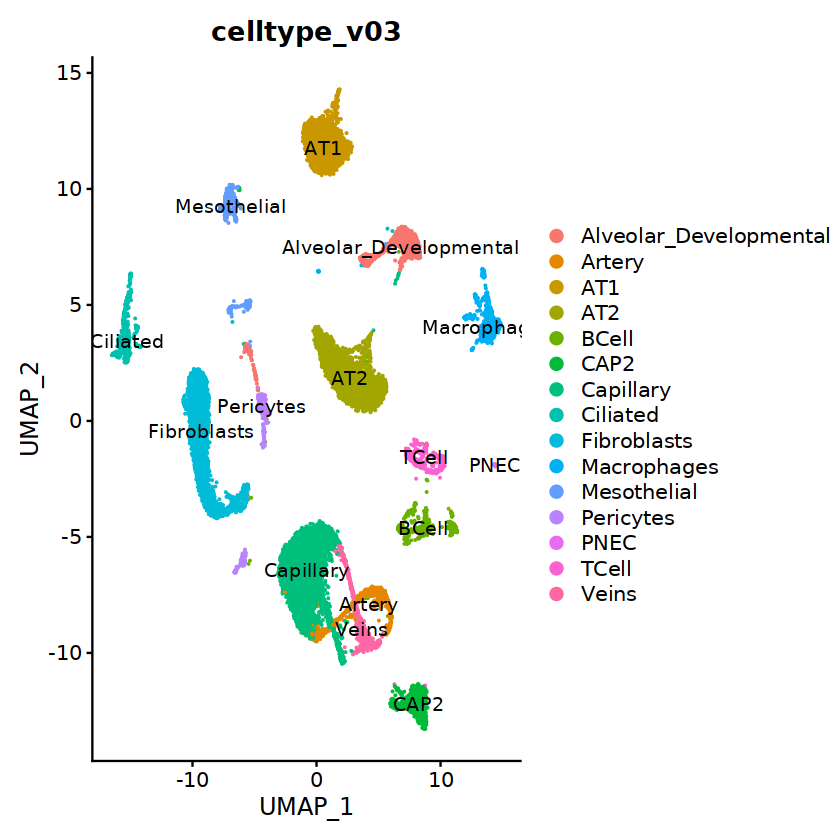

In [44]:
DimPlot(sobj_filt_nodoub, group.by = "celltype_v03", label = T)

In [51]:
# now pericytes and mesothelial are split
pericytes.markers <- c("Pdgfrb", "Cspg4", "Foxd1")
mesothelial.markers <- c("Msln", "Upk3b", "Wt1")

Warning message:
“Found the following features in more than one assay, excluding the default. We will not include these in the final data frame: Cspg4”
Warning message:
“Could not find Foxd1 in the default search locations, found in RNA assay instead”
Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: Cspg4”


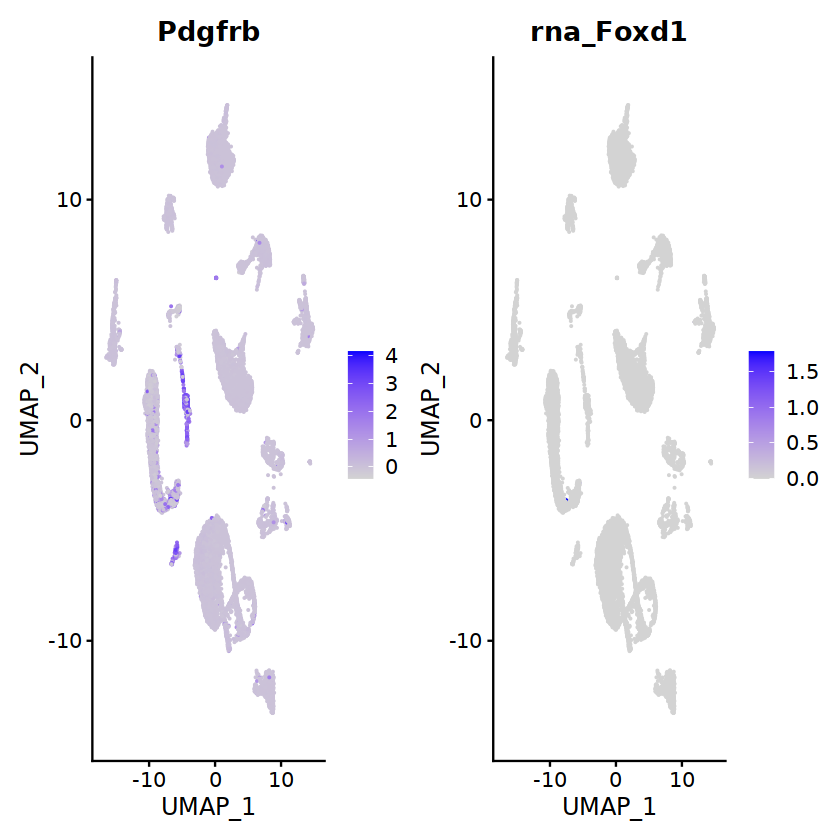

In [52]:
FeaturePlot(sobj_filt_nodoub, pericytes.markers)

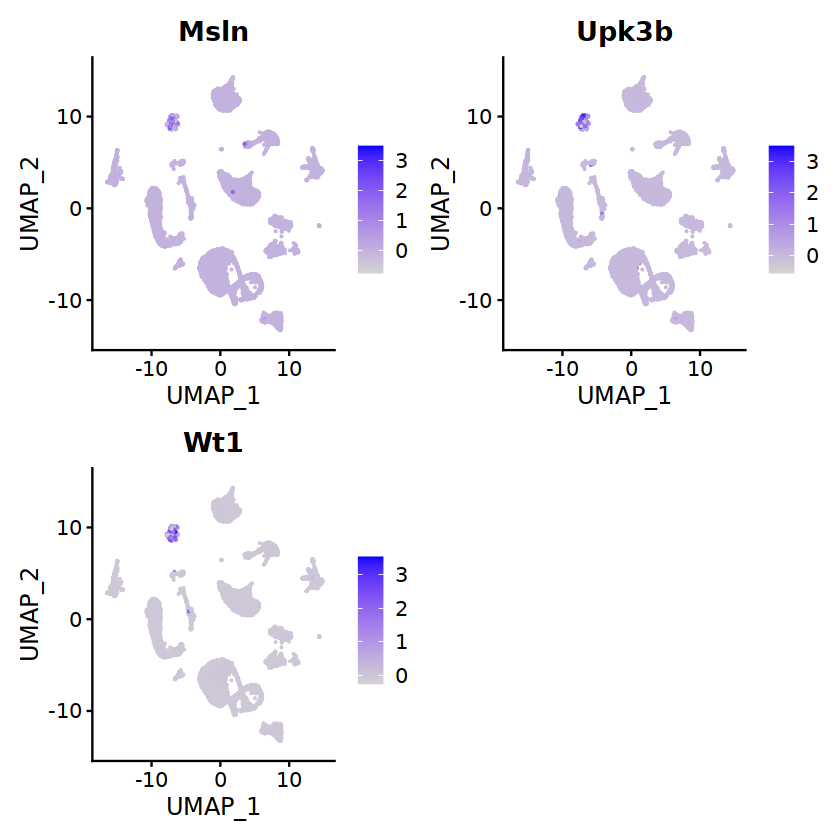

In [50]:
FeaturePlot(sobj_filt_nodoub, mesothelial.markers)

In [56]:
library(dplyr)
assignment <- sobj_filt_nodoub$seurat_clusters
celltype_manual_anno <- case_when(


    assignment == 0 ~ "Capillary",
    assignment == 1 ~ "AT1",
    assignment == 2 ~ "AT2",
    assignment == 3 ~ "Fibroblasts",
    
    assignment == 4 ~ "Fibroblasts", #?
    
    assignment == 5 ~ "Secretory",
    assignment == 6 ~ "CAP2", #? 
   
    assignment == 7 ~ "Macrophages", #?,
    assignment == 8 ~ "Artery",
    assignment == 9 ~ "Ciliated",
    
    assignment == 10 ~ "Veins",
    assignment == 11 ~ "BCell",
   
    assignment == 12 ~ "Pericytes",
    assignment == 13 ~ "TCell",

    assignment == 14 ~ "Capillary", 
    
    assignment == 15 ~ "Mesothelial",
    assignment == 16 ~ "Macrophages", 
   
    assignment == 17 ~ "Mesothelial" ,
    assignment == 18 ~ "Pericytes",
    
    assignment == 19 ~ "PNEC"


  
    

    
)

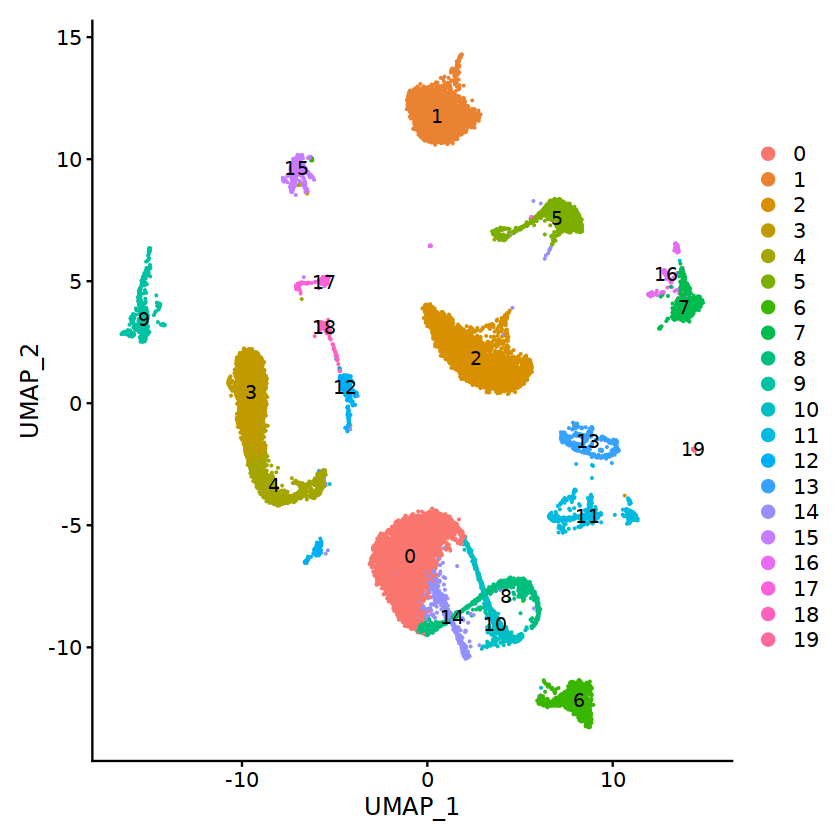

In [54]:
DimPlot(sobj_filt_nodoub, label = T)

In [57]:
sobj_filt_nodoub$celltype_v04 <- celltype_manual_anno

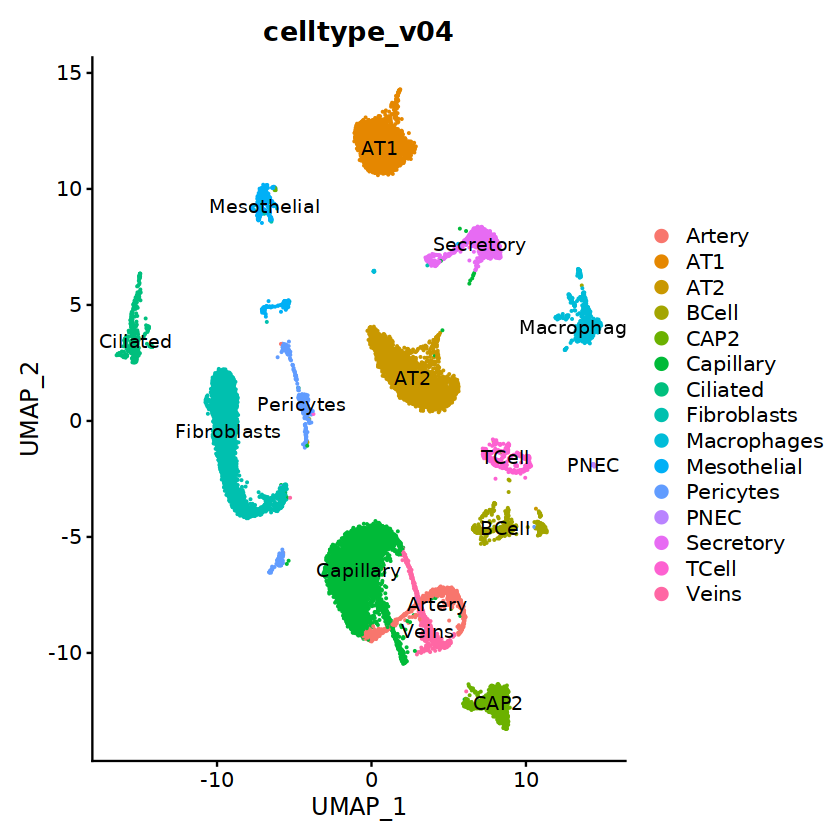

In [58]:
DimPlot(sobj_filt_nodoub, label = T, group.by = "celltype_v04")

In [59]:
Sys.time()
saveRDS(sobj_filt_nodoub , "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/06_paired_tag_integ_atac/240104_lung_pt_integ_atac_nodoub.RDS")
Sys.time()

[1] "2024-01-04 14:50:18 PST"

[1] "2024-01-04 14:51:31 PST"